In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import urllib.request

In [51]:
RAW_DF = pd.read_csv('Top_10000_Movies.csv',lineterminator='\n')
RAW_DF.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.


In [52]:
RAW_DF.shape

(10000, 13)

In [53]:
RAW_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   id                 10000 non-null  int64  
 2   original_language  10000 non-null  object 
 3   original_title     10000 non-null  object 
 4   popularity         10000 non-null  float64
 5   release_date       9962 non-null   object 
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  int64  
 8   genre              10000 non-null  object 
 9   overview           9900 non-null   object 
 10  revenue            10000 non-null  int64  
 11  runtime            9991 non-null   float64
 12  tagline            7080 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [54]:
RAW_DF.isna().sum()

Unnamed: 0              0
id                      0
original_language       0
original_title          0
popularity              0
release_date           38
vote_average            0
vote_count              0
genre                   0
overview              100
revenue                 0
runtime                 9
tagline              2920
dtype: int64

# 영화별로 어떤 장르에 속하는지 확인

In [55]:
raw_genre_list = df['genre'].tolist()
raw_genre_list

["['Science Fiction', 'Action', 'Adventure']",
 "['Action', 'Adventure', 'Science Fiction', 'Fantasy']",
 "['Action', 'Adventure', 'Science Fiction']",
 "['Action', 'Crime', 'Thriller']",
 "['Comedy', 'Action', 'Adventure', 'Science Fiction']",
 "['Action', 'Thriller', 'Crime']",
 "['Science Fiction', 'Action']",
 "['Horror', 'Thriller']",
 "['Horror', 'Thriller']",
 "['Action', 'Thriller']",
 "['Animation', 'Comedy', 'Family']",
 "['Animation', 'Action']",
 "['Action', 'Adventure', 'Fantasy']",
 "['Action', 'Adventure']",
 "['Crime', 'Action', 'Thriller']",
 "['Horror']",
 "['Action', 'Comedy', 'Thriller', 'Horror']",
 "['Science Fiction', 'Thriller', 'Mystery']",
 "['Animation', 'Action', 'Adventure', 'Fantasy']",
 "['Action', 'Crime', 'Thriller']",
 "['Comedy', 'Crime']",
 "['Fantasy', 'Adventure', 'Comedy']",
 "['Crime', 'Mystery', 'Drama', 'Comedy']",
 "['Action', 'Adventure', 'Fantasy']",
 "['Animation', 'Action', 'Adventure', 'Science Fiction']",
 "['Animation', 'Comedy', 'Adven

In [40]:
# temp_arr_str = "['Action', 'Adventure', 'Science Fiction']"
# temp_arr_str.strip('[').strip(']').replace(' ', '').replace("'", '').split(',')

In [57]:
genre_df = df[['id', 'original_title']]
genre_df.head()

,id,original_title
0,580489,Venom: Let There Be Carnage
1,524434,Eternals
2,438631,Dune
3,796499,Army of Thieves
4,550988,Free Guy


In [66]:
temp_df = RAW_DF.copy()
temp_df = RAW_DF['genre'].apply(lambda x: x.strip('[').strip(']').replace(' ', '').replace("'", '').split(','))
genre_df = temp_df
genre_df

0                     [ScienceFiction, Action, Adventure]
1            [Action, Adventure, ScienceFiction, Fantasy]
2                     [Action, Adventure, ScienceFiction]
3                               [Action, Crime, Thriller]
4             [Comedy, Action, Adventure, ScienceFiction]
                              ...                        
9995    [Adventure, Animation, Comedy, ScienceFiction,...
9996                              [History, Drama, Music]
9997                       [Drama, Action, Thriller, War]
9998                              [Drama, Music, Romance]
9999                           [Drama, Mystery, Thriller]
Name: genre, Length: 10000, dtype: object

In [39]:
genre_list = df['genre_list'].tolist()
genre_list

[['ScienceFiction', 'Action', 'Adventure'],
 ['Action', 'Adventure', 'ScienceFiction', 'Fantasy'],
 ['Action', 'Adventure', 'ScienceFiction'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Action', 'Adventure', 'ScienceFiction'],
 ['Action', 'Thriller', 'Crime'],
 ['ScienceFiction', 'Action'],
 ['Horror', 'Thriller'],
 ['Horror', 'Thriller'],
 ['Action', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Animation', 'Action'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure'],
 ['Crime', 'Action', 'Thriller'],
 ['Horror'],
 ['Action', 'Comedy', 'Thriller', 'Horror'],
 ['ScienceFiction', 'Thriller', 'Mystery'],
 ['Animation', 'Action', 'Adventure', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Crime'],
 ['Fantasy', 'Adventure', 'Comedy'],
 ['Crime', 'Mystery', 'Drama', 'Comedy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Animation', 'Action', 'Adventure', 'ScienceFiction'],
 ['Animation', 'Comedy', 'Adventure', 'Family'],
 ['Horror'],
 ['Action', 'Comedy', 'Adve

In [53]:
unique_genre = list()

for genres in genre_list:
    for genre in genres:
        if genre not in unique_genre:
            if genre != '':
                unique_genre.append(genre)

unique_genre

['ScienceFiction',
 'Action',
 'Adventure',
 'Fantasy',
 'Crime',
 'Thriller',
 'Comedy',
 'Horror',
 'Animation',
 'Family',
 'Mystery',
 'Drama',
 'Romance',
 'Music',
 'Western',
 'TVMovie',
 'History',
 'War',
 'Documentary']

In [54]:
len(unique_genre)

19

In [43]:
df.head(3)

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline,genre_list
0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN,"[ScienceFiction, Action, Adventure]"
1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...,"[Action, Adventure, ScienceFiction, Fantasy]"
2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits.","[Action, Adventure, ScienceFiction]"


In [152]:
df_copy = df_genre.copy()
for genre in unique_genre:
    df_copy[f'genre_{genre}'] = df['genre_list'].apply(lambda x: 1 if genre in x else 0)

df_genre = df_copy
df_genre

,id,original_title,release_date,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,genre_Comedy,...,genre_Family,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary
0,580489,Venom: Let There Be Carnage,2021-09-30,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,524434,Eternals,2021-11-03,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,438631,Dune,2021-09-15,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,796499,Army of Thieves,2021-10-27,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,550988,Free Guy,2021-08-11,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,A Grand Day Out,1990-05-18,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
9996,15934,El cantante,2006-09-12,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
9997,162215,How I Live Now,2013-09-10,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
9998,5723,Once,2007-03-23,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


In [136]:
df_genre.isna().sum()

id                         0
original_title             0
genre_ScienceFiction    8730
genre_Action            7424
genre_Adventure         8239
genre_Fantasy           8736
genre_Crime             8760
genre_Thriller          7450
genre_Comedy            6990
genre_Horror            8458
genre_Animation         8637
genre_Family            8636
genre_Mystery           9192
genre_Drama             6177
genre_Romance           8588
genre_Music             9699
genre_Western           9874
genre_TVMovie           9758
genre_History           9595
genre_War               9728
genre_Documentary       9694
release_date              38
dtype: int64

# language columns 확인

In [65]:
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline,genre_list
0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN,"[ScienceFiction, Action, Adventure]"
1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...,"[Action, Adventure, ScienceFiction, Fantasy]"
2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits.","[Action, Adventure, ScienceFiction]"
3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend.","[Action, Crime, Thriller]"
4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.,"[Comedy, Action, Adventure, ScienceFiction]"


In [76]:
df['original_language'].value_counts()

en    7798
ja     609
es     417
fr     293
ko     140
it     104
zh     103
cn      79
de      78
ru      69
pt      55
hi      30
da      30
no      24
sv      22
nl      19
pl      19
th      15
id      15
tr      10
he       9
cs       6
fi       6
fa       5
uk       5
hu       4
sr       4
lv       3
te       3
tl       3
el       3
ro       2
eu       2
is       2
ta       2
ca       1
ur       1
be       1
ga       1
la       1
bn       1
ml       1
ka       1
ar       1
nb       1
sk       1
ms       1
Name: original_language, dtype: int64

# title이 겹치는 칭구들 확인

In [98]:
id_list = df['id'].tolist()
title_list = df['original_title'].tolist()
date_list = df['release_date'].tolist()

In [95]:
len(id_list), len(title_list)

(10000, 10000)

In [120]:
memory = dict()
for id, title,date in zip(id_list, title_list, date_list):
    if title not in memory.keys():
        memory[title] = (id, date)
    else:
        print('memory\t', title, memory[title])
        print('doubled\t', title, (id, date))

memory	 Ava (453354, '2017-06-21')
doubled	 Ava (539885, '2020-07-02')
memory	 Child's Play (10585, '1988-11-08')
doubled	 Child's Play (533642, '2019-06-19')
memory	 Venom (335983, '2018-09-28')
doubled	 Venom (7182, '2005-09-16')
memory	 Cinderella (593910, '2021-09-03')
doubled	 Cinderella (11224, '1950-02-22')
memory	 The Lion King (8587, '1994-06-23')
doubled	 The Lion King (420818, '2019-07-12')
memory	 Dune (438631, '2021-09-15')
doubled	 Dune (841, '1984-12-14')
memory	 Mulan (337401, '2020-09-04')
doubled	 Mulan (10674, '1998-06-18')
memory	 Venom (335983, '2018-09-28')
doubled	 Venom (30789, '1981-11-28')
memory	 Cinderella (593910, '2021-09-03')
doubled	 Cinderella (150689, '2015-03-12')
memory	 Hercules (11970, '1997-06-20')
doubled	 Hercules (184315, '2014-07-23')
memory	 The Addams Family (481084, '2019-10-10')
doubled	 The Addams Family (2907, '1991-11-22')
memory	 Halloween (424139, '2018-10-18')
doubled	 Halloween (2082, '2007-08-31')
memory	 Halloween (424139, '2018-1

## 재개봉 영화인가?

## 재개봉 영화는 늘 더 높은 점수를 받는가?

얼마나 재밌으면 다시 개봉했을까! 나라별로 개봉시점이 달랐던 경우도 있는건가?

# 시계열로 장르들의 변화 보기

In [185]:
df_genre['release_date'] = df['release_date']

In [142]:
df_genre['release_date'] = pd.to_datetime(df_genre['release_date'])
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10000 non-null  int64         
 1   original_title        10000 non-null  object        
 2   genre_ScienceFiction  1270 non-null   float64       
 3   genre_Action          2576 non-null   float64       
 4   genre_Adventure       1761 non-null   float64       
 5   genre_Fantasy         1264 non-null   float64       
 6   genre_Crime           1240 non-null   float64       
 7   genre_Thriller        2550 non-null   float64       
 8   genre_Comedy          3010 non-null   float64       
 9   genre_Horror          1542 non-null   float64       
 10  genre_Animation       1363 non-null   float64       
 11  genre_Family          1364 non-null   float64       
 12  genre_Mystery         808 non-null    float64       
 13  genre_Drama      

In [153]:
# columns의 순서 변경 - release date를 앞으로
df_genre = df_genre[['id', 'original_title', 'release_date', 'genre_ScienceFiction', 'genre_Action',
       'genre_Adventure', 'genre_Fantasy', 'genre_Crime', 'genre_Thriller',
       'genre_Comedy', 'genre_Horror', 'genre_Animation', 'genre_Family',
       'genre_Mystery', 'genre_Drama', 'genre_Romance', 'genre_Music',
       'genre_Western', 'genre_TVMovie', 'genre_History', 'genre_War',
       'genre_Documentary']]
df_genre.head()

,id,original_title,release_date,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,genre_Comedy,...,genre_Family,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary
0,580489,Venom: Let There Be Carnage,2021-09-30,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,524434,Eternals,2021-11-03,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,438631,Dune,2021-09-15,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,796499,Army of Thieves,2021-10-27,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,550988,Free Guy,2021-08-11,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df_genre_year = df_genre[['id', 'original_title']]

In [168]:
df_genre['year'] = df_genre['release_date'].dt.year

In [169]:
df_genre.head(10)

,id,original_title,release_date,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,genre_Comedy,...,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary,year
0,580489,Venom: Let There Be Carnage,2021-09-30,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021.0
1,524434,Eternals,2021-11-03,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2021.0
2,438631,Dune,2021-09-15,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021.0
3,796499,Army of Thieves,2021-10-27,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2021.0
4,550988,Free Guy,2021-08-11,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2021.0
5,574060,Gunpowder Milkshake,2021-07-14,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2021.0
6,335983,Venom,2018-09-28,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018.0
7,610253,Halloween Kills,2021-10-14,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2021.0
8,871964,W lesie dziś nie zaśnie nikt 2,2021-10-27,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2021.0
9,768449,American Badger,2021-03-05,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2021.0


In [186]:
df_genre = df_genre[['id', 'original_title', 'release_date', 'year', 'genre_ScienceFiction', 'genre_Action',
       'genre_Adventure', 'genre_Fantasy', 'genre_Crime', 'genre_Thriller',
       'genre_Comedy', 'genre_Horror', 'genre_Animation', 'genre_Family',
       'genre_Mystery', 'genre_Drama', 'genre_Romance', 'genre_Music',
       'genre_Western', 'genre_TVMovie', 'genre_History', 'genre_War',
       'genre_Documentary']]
df_genre.head()

,id,original_title,release_date,year,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,...,genre_Family,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary
0,580489,Venom: Let There Be Carnage,2021-09-30,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,524434,Eternals,2021-11-03,2021.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,438631,Dune,2021-09-15,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,796499,Army of Thieves,2021-10-27,2021.0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,550988,Free Guy,2021-08-11,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
df_genre_year = df_genre.groupby("year").sum()
df_genre_year.head()

,id,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,genre_Comedy,genre_Horror,genre_Animation,genre_Family,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary
year,,,,,,,,,,,,,,,,,,,,
1902.0,775,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1920.0,234,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
1922.0,1322,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1923.0,22596,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1924.0,992,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [190]:
df_genre.loc[df_genre['year'] > 2021.0]

,id,original_title,release_date,year,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,...,genre_Family,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary
131,385687,Fast & Furious 10,2023-04-06,2023.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
141,585083,Hotel Transylvania: Transformania,2022-01-14,2022.0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,526896,Morbius,2022-01-20,2022.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,569094,Spider-Man: Across the Spider-Verse,2022-10-06,2022.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873,603692,John Wick: Chapter 4 - Hagakure,2022-05-25,2022.0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
883,76600,Avatar 2,2022-12-14,2022.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
902,298618,The Flash,2022-11-02,2022.0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1121,675353,Sonic the Hedgehog 2,2022-03-31,2022.0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1210,667538,Transformers: Rise of the Beasts,2022-06-22,2022.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1469,414906,The Batman,2022-03-02,2022.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [192]:
df_genre_year

,id,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,genre_Comedy,genre_Horror,genre_Animation,genre_Family,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary
year,,,,,,,,,,,,,,,,,,,,
1902.0,775,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1920.0,234,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
1922.0,1322,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1923.0,22596,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1924.0,992,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.0,18228370,11,23,16,10,4,6,8,6,6,5,2,5,1,0,0,0,0,0,1
2023.0,4393322,4,6,6,2,1,1,3,0,0,1,0,0,1,0,0,0,0,0,0
2024.0,83533,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [212]:
df_genre_year.loc[df_genre_year.index <= 2021.0]

,id,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,genre_Comedy,genre_Horror,genre_Animation,genre_Family,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary
year,,,,,,,,,,,,,,,,,,,,
1902.0,775,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1920.0,234,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
1922.0,1322,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1923.0,22596,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1924.0,992,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017.0,237759429,74,151,89,71,69,146,143,85,72,68,63,267,62,11,4,16,37,16,17
2018.0,269167464,78,150,92,73,79,161,151,96,66,55,51,232,80,22,4,16,31,15,19
2019.0,312564939,59,138,91,72,60,169,166,92,83,66,52,223,65,19,3,18,43,17,23


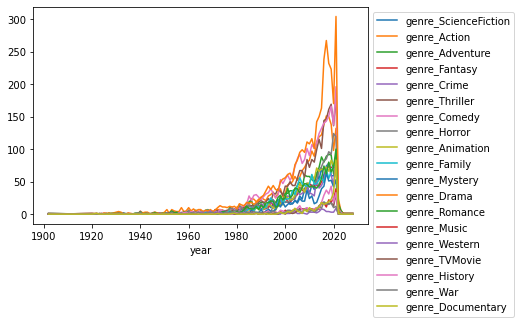

In [203]:
df_genre_year_plot = df_genre_year.drop(columns=['id'])
df_genre_year_plot.plot.line()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## 너무 예전 내용은 제외

In [215]:
df_genre_from_2000 = df_genre_year.loc[(df_genre_year.index >=2000.0) & (df_genre_year.index <=2021.0)]

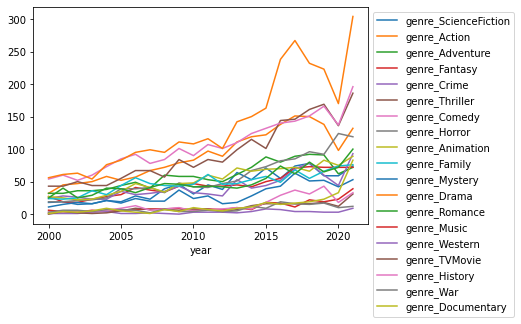

In [226]:
# df_genre_from_2000 = df_genre_from_2000.drop(columns=['id'])
df_genre_from_2000.plot.line()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## 잘 안보이노..

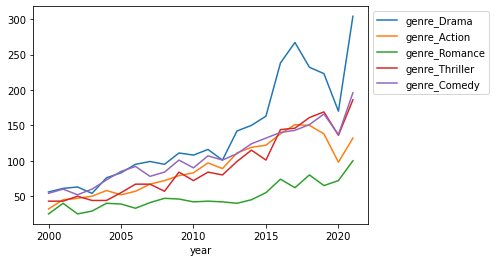

In [230]:
df_genre_from_2000[['genre_Drama', 'genre_Action', 'genre_Romance', 'genre_Thriller', 'genre_Comedy']].plot.line()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [233]:
df_genre_from_2000.columns = df_genre_from_2000.columns.map(lambda x: x.lower())

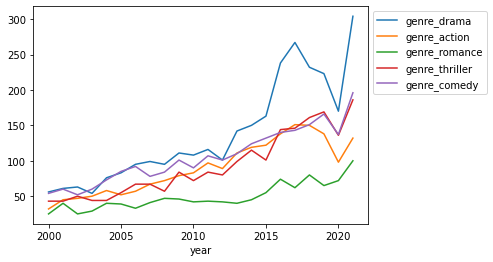

In [234]:
# 확인해보고 싶은 칼럼명을 입력
genre_list_for_check = ['genre_drama', 'genre_action', 'genre_romance', 'genre_thriller', 'genre_comedy']
df_genre_from_2000[genre_list_for_check].plot.line()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# 워드클라우드 연습

In [238]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [239]:
from wordcloud import WordCloud

In [243]:
df_genre

,id,original_title,release_date,year,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,...,genre_Family,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary
0,580489,Venom: Let There Be Carnage,2021-09-30,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,524434,Eternals,2021-11-03,2021.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,438631,Dune,2021-09-15,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,796499,Army of Thieves,2021-10-27,2021.0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,550988,Free Guy,2021-08-11,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,A Grand Day Out,1990-05-18,1990.0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9996,15934,El cantante,2006-09-12,2006.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
9997,162215,How I Live Now,2013-09-10,2013.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9998,5723,Once,2007-03-23,2007.0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


In [256]:
df_genre

,id,original_title,release_date,year,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,...,genre_Family,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary
2,438631,Dune,2021-09-15,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,796499,Army of Thieves,2021-10-27,2021.0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,550988,Free Guy,2021-08-11,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,574060,Gunpowder Milkshake,2021-07-14,2021.0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,335983,Venom,2018-09-28,2018.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,A Grand Day Out,1990-05-18,1990.0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9996,15934,El cantante,2006-09-12,2006.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
9997,162215,How I Live Now,2013-09-10,2013.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9998,5723,Once,2007-03-23,2007.0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


In [268]:
df_genre.head()

,id,original_title,release_date,year,genre_ScienceFiction,genre_Action,genre_Adventure,genre_Fantasy,genre_Crime,genre_Thriller,...,genre_Family,genre_Mystery,genre_Drama,genre_Romance,genre_Music,genre_Western,genre_TVMovie,genre_History,genre_War,genre_Documentary
0,580489,Venom: Let There Be Carnage,2021-09-30,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,524434,Eternals,2021-11-03,2021.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,438631,Dune,2021-09-15,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,796499,Army of Thieves,2021-10-27,2021.0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,550988,Free Guy,2021-08-11,2021.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
CLIENT_ID = "HtfP5tkULjT1h3WbgCOp" # 개발자센터에서 발급받은 Client ID 값
CLIENT_SECRECT = "uWxZSdZkIO" # 개발자센터에서 발급받은 Client Secret 값

In [29]:
def translate_title(origin_lang, origin_title, target_lang="en"):
    encText = urllib.parse.quote(origin_title)
    data = f"source={origin_lang}&target={target_lang}&text={origin_title}"
    url = "https://openapi.naver.com/v1/papago/n2mt"
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",CLIENT_ID)
    request.add_header("X-Naver-Client-Secret",CLIENT_SECRECT)
    response = urllib.request.urlopen(request, data=data.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        translated = response_body.decode('utf-8').split('translatedText":"')[1].split(',')[0].strip('"')
        return ('success', translated)
    else:
        return ("error", rescode)

In [30]:
translate_title('ja', '劇場版「鬼滅の刃」無限列車編', "ko")

('success', '극장판 귀멸의 칼날 무한 열차편')

In [32]:
df_genre.head()

NameError: name 'df_genre' is not defined

In [263]:
genre_count_df = pd.DataFrame(df_genre.sum()).iloc[3:, :]
genre_count_df

,0
genre_ScienceFiction,1270
genre_Action,2576
genre_Adventure,1761
genre_Fantasy,1264
genre_Crime,1240
genre_Thriller,2550
genre_Comedy,3010
genre_Horror,1542
genre_Animation,1363
genre_Family,1364
